# Training

In [1]:
#library for regular expressions
import re

#library to read and import file from drive
import os

import cv2 as cv

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
from utility import plot_hist, data_loader

#### Functions

## Data loader

In [13]:
X_train = data_loader('../Data/Prepared/Train/OK', scale=True)
X_noisy = data_loader('../Data/Prepared/Train/noisyOK', scale=True)

## Train e validation set

In [17]:
X_train, X__train_val = train_test_split(np.expand_dims(np.array(X_train), -1), test_size=0.2, random_state=17)
X_noisy, X__noisy_val = train_test_split(np.expand_dims(np.array(X_noisy), -1), test_size=0.2, random_state=17)

# Autoencoder

### Diverse architeture di autoencoder

Autoencoder con fully connected

In [18]:
img_shape = X_train.shape[1:]
input_img = Input(img_shape)

#encoded = Dense(1, activation='relu')
encoded = Flatten()(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(np.prod(img_shape))(decoded)
decoded = Reshape((img_shape))(decoded)

In [19]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adamax', loss='mse')

In [20]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8388736   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 65536)             8454144   
_________________________________________________________________
reshape (Reshape)            (None, 256, 256, 1)      

In [29]:
#add early stopping
custom_early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.0001, mode='min')

#random seed 
tf.random.set_seed(17)

hist=autoencoder.fit(X_noisy, X_train, epochs=300, batch_size=16, shuffle=True,
                     validation_data=(X__noisy_val, X__train_val), callbacks=[custom_early_stopping])

Epoch 1/300
149/149 [==============================] - 18s 120ms/step - loss: 0.0576 - val_loss: 0.0286
Epoch 2/300
149/149 [==============================] - 17s 117ms/step - loss: 0.0221 - val_loss: 0.0173
Epoch 3/300
149/149 [==============================] - 17s 117ms/step - loss: 0.0151 - val_loss: 0.0136
Epoch 4/300
149/149 [==============================] - 17s 117ms/step - loss: 0.0128 - val_loss: 0.0119
Epoch 5/300
149/149 [==============================] - 17s 117ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 6/300
149/149 [==============================] - 17s 117ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 7/300
149/149 [==============================] - 17s 117ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 8/300
149/149 [==============================] - 18s 118ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 9/300
149/149 [==============================] - 18s 118ms/step - loss: 0.0098 - val_loss: 0.0106
Epoch 10/300
149/149 [==============================] - 18s 123m

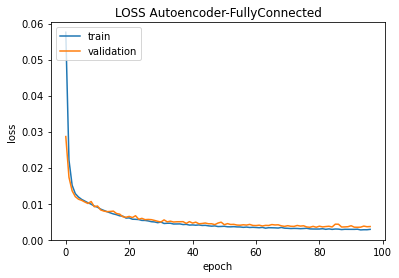

In [34]:
plot_hist(hist, 'Autoencoder-FullyConnected')

### Sample with spot artificially producted

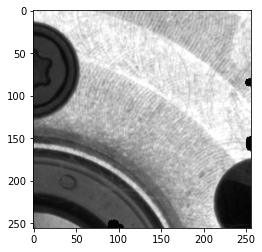

In [31]:
plt.imshow(np.squeeze(X_noisy[10],-1), cmap='gray')

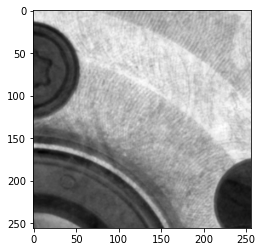

In [32]:
test_artificial = autoencoder.predict(np.expand_dims(X_noisy[10],0))
plt.imshow(np.squeeze(test_artificial[0], -1), cmap='gray')

### Saving model 

In [33]:
autoencoder.save("../Models/autoencoderFC")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../Models/autoencoderFC\assets
